# Домашнее задание № 3

### Выполнил Кузнецов С.И.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate as spint
%matplotlib inline

Решить систему линейных уравнений:

![alt text](https://italiandirectory.eu/wp-content/ql-cache/quicklatex.com-34a5602e13176cbddcfd35cca34478fe_l3.svg)

**Решение:**

Запишем систему в матричной форме

In [2]:
A = np.array([
    [2, 1, 1],
    [1, 3, 2],
    [1, 0, 0]
])
b = np.array([4, 5, 6])
print('A:\n', A)
print('b:\n', b)

A:
 [[2 1 1]
 [1 3 2]
 [1 0 0]]
b:
 [4 5 6]


In [3]:
x = np.linalg.solve(A, b)
print('Решение системы:\n a = {:.4f},\n b = {:.4f},\n c = {:.4f}.'.format(x[0], x[1], x[2]))

Решение системы:
 a = 6.0000,
 b = 15.0000,
 c = -23.0000.


Выполним проверку:

In [4]:
np.allclose(np.dot(A, x), b)

True

*Решение верное*

Анна выбирает тарифный план для телефонной связи. Первый план, T1, стоит 20 долларов в месяц, каждый звонок стоит 25 центов в минуту. Второй тарифный план, T2, стоит 40долларов в месяц, но звонки стоят 8 центов в минуту. Какой план ей выбрать, если Анна звонит не более 117 минут в месяц?

Составим задачу в системе линейных уравнений. 

Количество минут - независимая переменная, будет нашим x. Стоимость тарифа - зависимая величина, будет нашим y. 

Написать систему уравнений для данной задачи, построить график, найти точку пересечения прямых. 
Сделать вывод о том, какой тариф использовать лучше для Анны.

**Решение:**

Пусть

$x$ - количество минут в месяц, которые Анна звонит,
$y$ - стоимость звонков.

Тогда по первому тарифу стоимость звонков будет равна
$$y = 20 + 0,25 x;$$
по второму - 
$$y = 40 + 0,08 x.$$ 

Найдем количество минут, при котором стоимость звонков по обоим тарифам будет одинаковой.
Для этого нужно решить систему уравнений:
$$
\begin{cases}
y = 20 + 0,25 x; \\
y = 40 + 0,08 x.
\end{cases}
$$

Приведем систему к каноническому виду:
$$
\begin{cases}
0,25 x - y = -20; \\
0,08 x - y = - 40.
\end{cases}
$$

Запишем систему в матричной форме и найдем решение.

In [5]:
A = np.array([
    [0.25, -1],
    [0.08, -1]
])
b = np.array([-20, -40])
print('A:\n', A)
print('b:\n', b)
x = np.linalg.solve(A, b)
print('Решение системы:\n x = {:.4f},\n y = {:.4f}.'.format(x[0], x[1]))

A:
 [[ 0.25 -1.  ]
 [ 0.08 -1.  ]]
b:
 [-20 -40]
Решение системы:
 x = 117.6471,
 y = 49.4118.


Т.е. при 117.6471 минут разговора в месяц стоимость разговоров будет одинаковой.

Построим графики, чтобы определить, какой тариф выгоднее

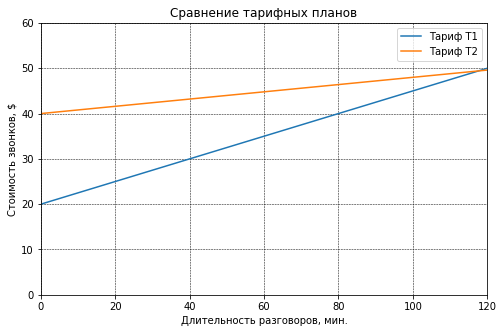

In [6]:
# Первый тариф
def T1(x):
    return 20 + 0.25 * x

# Второй тариф
def T2(x):
    return 40 + 0.08 * x

# Рисуем графики
plt.figure(figsize = (8, 5))

plt.plot([0, 120], [T1(0), T1(120)])
plt.plot([0, 120], [T2(0), T2(120)])

plt.xlim([0, 120])
plt.ylim([0, 60])

plt.legend(['Тариф T1', 'Тариф T2'])

plt.xlabel('Длительность разговоров, мин.')
plt.ylabel('Стоимость звонков, $')

plt.title('Сравнение тарифных планов')

plt.grid(color='black', linestyle='--', linewidth=.5)

plt.show()

*Видно, что при длительности разговоров не более 117 мин. в месяц наиболее выгодным является тарифный план T1.*

Загрузить датасет Boston houses. 
Выбрать 3-хмерное пространство (3 атрибута из таблицы), взять 3 дома по данному трехмерному пространству, доказать, что данные векторы не компланарны.

**Решение:**

In [7]:
boston = load_boston()
boston = pd.DataFrame(data=boston.data,columns=boston.feature_names)
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [8]:
# Параметры
params = ['NOX', 'RM', 'LSTAT']

# Дома
x1_vec = boston[params].iloc[0]
x2_vec = boston[params].iloc[1]
x3_vec = boston[params].iloc[2]

print('Дом 1:\n', x1_vec, '\n')
print('Дом 2:\n', x2_vec, '\n')
print('Дом 3:\n', x3_vec, '\n')

Дом 1:
 NOX      0.538
RM       6.575
LSTAT    4.980
Name: 0, dtype: float64 

Дом 2:
 NOX      0.469
RM       6.421
LSTAT    9.140
Name: 1, dtype: float64 

Дом 3:
 NOX      0.469
RM       7.185
LSTAT    4.030
Name: 2, dtype: float64 



Чтобы проверить компланарность, вычислим определитель матрицы, составленной из координат векторов, характеризующих дома.

In [9]:
A = np.matrix([x1_vec.tolist(), x2_vec.tolist(), x3_vec.tolist()])
print(A)
print('Определитель матрицы равен {:.2f}.'.format(np.linalg.det(A)))

[[0.538 6.575 4.98 ]
 [0.469 6.421 9.14 ]
 [0.469 7.185 4.03 ]]
Определитель матрицы равен -3.87.


*Так как определитель матрицы, составленной из координат векторов не равен 0, то векторы являются линейно независимыми. Следовательно, эти векторы некомпланарны.*

Для матрицы, полученной на предыдущей задачи, посчитать собственный вектор(v). Умножить собственный вектор на матрицу (Av). Сделать график. Во сколько раз Av отличается от v?

**Решение:**

Найдем собственные числа и собственные векторы матрицы

In [10]:
eigen_nums, eigen_vectors = np.linalg.eig(A)

print('Собственные числа:\n', eigen_nums, '\n')
for i in range(eigen_vectors.shape[0]):
    print('Собственный вектор {:n}:'.format(i + 1))
    print(eigen_vectors[:,i], '\n')

Собственные числа:
 [13.83121691  0.09518889 -2.9374058 ] 

Собственный вектор 1:
[[0.52721732]
 [0.67308634]
 [0.51864889]] 

Собственный вектор 2:
[[ 0.99816443]
 [-0.05975358]
 [-0.00986316]] 

Собственный вектор 3:
[[ 0.30829438]
 [-0.67253869]
 [ 0.67278993]] 



В качестве собственного вектора возьмем собственный вектор 2. Построим векторы $\vec{v_2}$ и $A\vec{v_2}$

Text(0.5, 0, 'LSTAT')

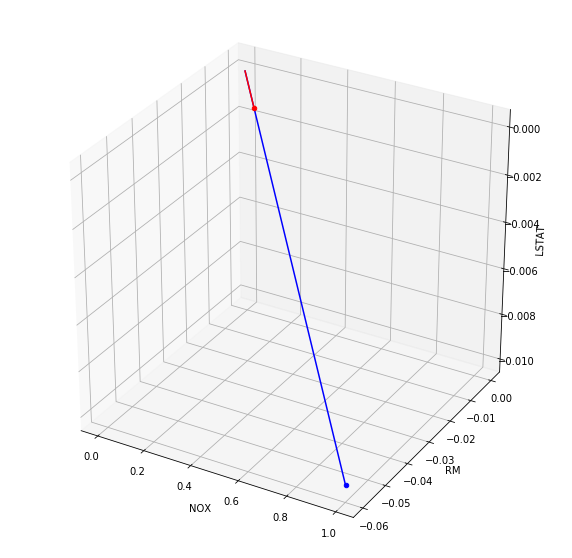

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

v_2 = eigen_vectors[:,1]
Av_2 = np.dot(A, v_2)

ax.plot([0, v_2[0]], [0, v_2[1]], [0, v_2[2]], c='b')
ax.plot([0, Av_2[0]], [0, Av_2[1]], [0, Av_2[2]], c='r')

ax.scatter(v_2[0], v_2[1], v_2[2], c='b', marker='o')
ax.scatter(Av_2[0], Av_2[1], Av_2[2], c='r', marker='o')

ax.set_xlabel(params[0])
ax.set_ylabel(params[1])
ax.set_zlabel(params[2])



Найдем различия между векторами $v_2$ и $Av_2$

In [12]:
Av_2 / v_2

matrix([[0.09518889],
        [0.09518889],
        [0.09518889]])

*Оба вектора коллинеарны, а их длина различается в 0.09518889 раз, т.к. 0.09518889 - собственное число, соответствующее вектору $\vec{v_2}$*

Задание повышенного уровня.

Как посчитать интеграл полинома, полученного в домашнем задании №2, при полиномиальной регрессии?

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target
  
x = boston.LSTAT

x = np.array(x).reshape(-1, 1)
y = price

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression()
model = lin2.fit(X_poly, y)

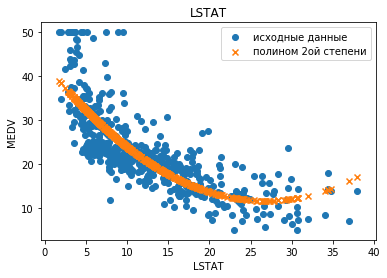

In [14]:
y_pred = model.predict(poly.fit_transform(x))
plt.scatter(x, y, marker='o')
plt.scatter(x, y_pred, marker='x')
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['исходные данные', 'полином 2ой степени'])
plt.show()

**Решение:**

Найдем интеграл численно с помощью функции из библиотеки *scipy*.

In [15]:
# Зададим функцию
def f(x):
    return model.predict(poly.fit_transform(np.array([[0]])))

integ, accur = spint.quad(f, 0, 40)
print(' Интеграл равен {:.2f}.\n Точность вычислений: {}'.format(integ, accur))

 Интеграл равен 1714.48.
 Точность вычислений: 1.9034554966954368e-11
